Numerical Differentiation
========================

In order to numerically evaluate a derivative $y'(x)=dy/dx$ at point $x_0$, we approximate is by using finite differences:
Therefore we find: 

$dx \approx \Delta x =x_1-x_0$

$dy \approx \Delta y =y_1-y_0= y(x_1)-y(x_0) = y(x_0+\Delta_x)-y(x_0)$

Then we re-write the derivative in terms of discrete differences as:
$$\frac{dy}{dx} \approx \frac{\Delta y}{\Delta x}$$

#### Example

Let's look at the accuracy of this approximation in terms of the interval $\Delta x$. In our first example we will evaluate the derivative of $y=x^2$ at $x=1$.

In [3]:
dx = 1.
x = 1.
while(dx > 1.e-12):
    dy = (x+dx)*(x+dx) - x*x
    d = dy/dx
    print(f"x={x:.10f} dx={dx:.10f} dy={dy:.10f} d={d:.10f}")
    dx = dx / 10.


x=1.0000000000 dx=1.0000000000 dy=3.0000000000 d=3.0000000000
x=1.0000000000 dx=0.1000000000 dy=0.2100000000 d=2.1000000000
x=1.0000000000 dx=0.0100000000 dy=0.0201000000 d=2.0100000000
x=1.0000000000 dx=0.0010000000 dy=0.0020010000 d=2.0010000000
x=1.0000000000 dx=0.0001000000 dy=0.0002000100 d=2.0001000000
x=1.0000000000 dx=0.0000100000 dy=0.0000200001 d=2.0000100000
x=1.0000000000 dx=0.0000010000 dy=0.0000020000 d=2.0000009999
x=1.0000000000 dx=0.0000001000 dy=0.0000002000 d=2.0000001011
x=1.0000000000 dx=0.0000000100 dy=0.0000000200 d=1.9999999878
x=1.0000000000 dx=0.0000000010 dy=0.0000000020 d=2.0000001655
x=1.0000000000 dx=0.0000000001 dy=0.0000000002 d=2.0000001655
x=1.0000000000 dx=0.0000000000 dy=0.0000000000 d=2.0000001655
x=1.0000000000 dx=0.0000000000 dy=0.0000000000 d=2.0001778012


Why is it that the sequence does not converge? This is due to the round-off errors in the representation of the floating point numbers. To see this, we can simply type:

In [4]:
((1.+0.0001)*(1+.0001) - 1)

0.0002000099999999172

Let's try using powers of 1/2

In [9]:
dx = 1.
x = 1.
while(dx > 1.e-12):
    dy = (x+dx)*(x+dx) - x*x
    d = dy/dx
    print(f"x={x:.10f} dx={dx:.10f} dy={dy:.10f} d={d:.10f}")
    dx = dx / 2.


x=1.0000000000 dx=1.0000000000 dy=3.0000000000 d=3.0000000000
x=1.0000000000 dx=0.5000000000 dy=1.2500000000 d=2.5000000000
x=1.0000000000 dx=0.2500000000 dy=0.5625000000 d=2.2500000000
x=1.0000000000 dx=0.1250000000 dy=0.2656250000 d=2.1250000000
x=1.0000000000 dx=0.0625000000 dy=0.1289062500 d=2.0625000000
x=1.0000000000 dx=0.0312500000 dy=0.0634765625 d=2.0312500000
x=1.0000000000 dx=0.0156250000 dy=0.0314941406 d=2.0156250000
x=1.0000000000 dx=0.0078125000 dy=0.0156860352 d=2.0078125000
x=1.0000000000 dx=0.0039062500 dy=0.0078277588 d=2.0039062500
x=1.0000000000 dx=0.0019531250 dy=0.0039100647 d=2.0019531250
x=1.0000000000 dx=0.0009765625 dy=0.0019540787 d=2.0009765625
x=1.0000000000 dx=0.0004882812 dy=0.0009768009 d=2.0004882812
x=1.0000000000 dx=0.0002441406 dy=0.0004883409 d=2.0002441406
x=1.0000000000 dx=0.0001220703 dy=0.0002441555 d=2.0001220703
x=1.0000000000 dx=0.0000610352 dy=0.0001220740 d=2.0000610352
x=1.0000000000 dx=0.0000305176 dy=0.0000610361 d=2.0000305176
x=1.0000

In addition, one could consider the midpoint difference, defined as:
$$ dy \approx \Delta y = y(x_0+\frac{\Delta_x}{2})-y(x_0-\frac{\Delta_x}{2}).$$

For a more complex function we need to import it from the math module. For instance, let's calculate the derivative of $sin(x)$ at $x=\pi/4$, including both the forward and midpoint differences.

In [10]:
from math import sin, sqrt, pi
dx = 1.
while(dx > 1.e-10):
    x = pi/4.
    d1 = sin(x+dx) - sin(x)
    d2 = sin(x+dx*.5) - sin(x-dx*.5)
    d1 = d1 / dx
    d2 = d2 / dx
    d1_err, d2_err = d1-sqrt(2.)/2., d2-sqrt(2.)/2.
    print(f"dx={dx:.10e} d1={d1:.10f} d1_err={d1_err:.10e} d2={d2:.10f} d2_err={d2_err:.10e}")
    dx = dx / 2.

dx=1.0000000000e+00 d1=0.2699544827 d1_err=-4.3715229847e-01 d2=0.6780100988 d2_err=-2.9096682344e-02
dx=5.0000000000e-01 d1=0.5048856976 d1_err=-2.0222108359e-01 d2=0.6997640691 d2_err=-7.3427120615e-03
dx=2.5000000000e-01 d1=0.6118351194 d1_err=-9.5271661738e-02 d2=0.7052667954 d2_err=-1.8399858320e-03
dx=1.2500000000e-01 d1=0.6611301361 d1_err=-4.5976645122e-02 d2=0.7066465151 d2_err=-4.6026607242e-04
dx=6.2500000000e-02 d1=0.6845566203 d1_err=-2.2550160859e-02 d2=0.7069916978 d2_err=-1.1508337488e-04
dx=3.1250000000e-02 d1=0.6959440535 d1_err=-1.1162727727e-02 d2=0.7070780093 d2_err=-2.8771897360e-05
dx=1.5625000000e-02 d1=0.7015538500 d1_err=-5.5529312347e-03 d2=0.7070995881 d2_err=-7.1930401987e-06
dx=7.8125000000e-03 d1=0.7043374663 d1_err=-2.7693148553e-03 d2=0.7071049829 d2_err=-1.7982641595e-06
dx=3.9062500000e-03 d1=0.7057239167 d1_err=-1.3828644400e-03 d2=0.7071063316 d2_err=-4.4956629497e-07
dx=1.9531250000e-03 d1=0.7064157979 d1_err=-6.9098331277e-04 d2=0.7071066688 d2_er

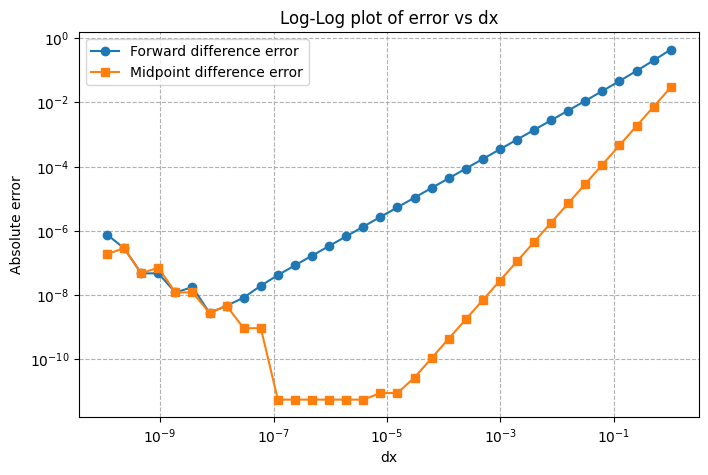

In [11]:
import numpy as np

import matplotlib.pyplot as plt

# We'll reconstruct the error arrays by rerunning the loop from cell 7
dxs = []
d1_errs = []
d2_errs = []

dx = 1.
while(dx > 1.e-10):
    x = pi/4.
    d1 = sin(x+dx) - sin(x)
    d2 = sin(x+dx*.5) - sin(x-dx*.5)
    d1 = d1 / dx
    d2 = d2 / dx
    d1_err, d2_err = d1-sqrt(2.)/2., d2-sqrt(2.)/2.
    dxs.append(dx)
    d1_errs.append(abs(d1_err))
    d2_errs.append(abs(d2_err))
    dx = dx / 2.

plt.figure(figsize=(8,5))
plt.loglog(dxs, d1_errs, 'o-', label='Forward difference error')
plt.loglog(dxs, d2_errs, 's-', label='Midpoint difference error')
plt.xlabel('dx')
plt.ylabel('Absolute error')
plt.legend()
plt.title('Log-Log plot of error vs dx')
plt.grid(True, which="both", ls="--")
plt.show()

What do you notice? Which one does better?

A more in-depth discussion about round-off errors in numerical differentiation can be found <a href="https://ocw.mit.edu/courses/18-335j-introduction-to-numerical-methods-spring-2019/pages/week-1/">here</a>

# Autodiff

Even better than numerical differentiation is automatic differentiation or *autodiff*, which is crucial to breakthroughs in machine learning.

This is a technique that allows to evaluate the derivative of a function to machine precision, without the need to use finite differences, using the fact that autodiff package knows the analytical form of the derivative for certain functions. It then builds a computational graph that allows for the evaluation of the derivative of a function using the chain rule.

In [14]:
import jax 
import jax.numpy as jnp

In [15]:
def f(x):
    return x**2

In [16]:
grad_f = jax.grad(f)

In [19]:
x = 13.0
# print the gradient 
grad_f(x)

Array(26., dtype=float32, weak_type=True)

Compare to finite difference

In [21]:
dx = 1.
x = 13.
while(dx > 1.e-10):
    dy = (x+dx)*(x+dx) - x*x
    d = dy/dx
    print(dx, d)
    dx = dx / 10.

1.0 27.0
0.1 26.099999999999852
0.01 26.009999999999422
0.001 26.000999999979513
0.0001 26.00009999980557
1e-05 26.000009998483616
1.0000000000000002e-06 26.000000985959556
1.0000000000000002e-07 25.999999877512884
1.0000000000000002e-08 26.000003572335114
1.0000000000000003e-09 26.000009256676996
1.0000000000000003e-10 25.999895569839275


In [22]:
grad_f(13.0)

Array(26., dtype=float32, weak_type=True)

In [23]:
def f_complicated(x):
    return jnp.cos(jnp.sin(jnp.tanh(x)))

grad_f_complicated = jax.grad(f_complicated)

In [25]:
grad_f_complicated(jnp.pi)

Array(-0.00301006, dtype=float32, weak_type=True)

Some of the most complicated functions out there are called *neural networks* which can involve millions or billions of smaller functions or *neurons* in the composition. Autodiff also works on them, which is one of the crucial reasons there has been so much progress in AI in the last 10 years. 

Let's recall our simple neural network architecture that we studied prevously, a feedforward neural network of depth $3$. The equation defining the network is given by:

$$\mathbf{y} = \mathbf{W}_3\sigma(\mathbf{W}_2\sigma(\mathbf{W}_1\mathbf{x}+\mathbf{b}_1)+\mathbf{b}_2)+\mathbf{b}_3$$

where $\mathbf{x}$ is the input vector, $\mathbf{y}$ is the neural network prediction, $\mathbf{W}_i$ and $\mathbf{b}_i$ are the weight matrices and bias vectors of the network, and $\sigma$ is the non-linear activation function. Recall that the weights and biases are the parameters that are updated when the network is trained to do something useful.

So why is autodiff important here? This function looks complicated, but it's just a composition of affine transformations and elementwise non-linearities. We know the derivative of each of these functions, so we can use the chain rule to compute the derivative of the entire network, which is crucial for training. For functions that are compositions of many smaller functions, this is much more efficient than using finite differences and it has less error.

# Ordinary differential equations

Let’s consider a simple 1st order equation: 

$\frac{dy}{dx}=f(x,y)$

To solve this equation with a computer we need to **discretize** the differences: we
have to convert the differential equation into a “**finite differences**” equation. The simplest
solution is Euler’s method.

## Euler’s method

Supouse that at a point $x_0$, the function $f$ has a value $y_0$. We
want to find the approximate value of $y$ in a point $x_1$ close to
$x_0$, $x_1=x_0+\Delta x$, with $\Delta x$ small. We assume that $f$,
the rate of change of $y$, is constant in this interval $\Delta x$.
Therefore we find: 

$dx \approx \Delta x =x_1-x_0\\$
$dy \approx \Delta y =y_1-y_0$
 
with $y_1=y(x_1)=y(x_0+\Delta x)$. Then we re-write the differential equation in terms of discrete differences as:

$\frac{\Delta y}{\Delta x}=f(x,y)$ 

or 

$\Delta y = f(x,y)\Delta x$

and approximate the value of $y_1$ as
$y_1=y_0+f(x_0,y_0)(x_1-x_0)$.

We can generalize this formula to find
the value of $y$ at $x_2=x_1+\Delta x$ as

$y_{2}=y_1+f(x_1,y_1)\Delta x,$ 

or in the general case:

$y_{n+1}=y_n+f(x_n,y_n)\Delta x$

This is a good approximation as long as $\Delta x$ is “small”. What is
small? Depends on the problem, but it is basically defined by the “rate
of change”, or “smoothness” of $f$. $f(x)$ has to behave smoothly and
without rapid variations in the interval $\Delta x$.

Notice that Euler’s method is equivalent to a 1st order Taylor expansion
about the point $x_0$. 

### Exercise 1.1: Newton’s law of cooling 

If the temperature difference between an object and its surroundings is
small, the rate of change of the temperature of the object is
proportional to the temperature difference: $\frac{dT}{dt}=-r(T-T_s),$
where $T$ is the temperature of the body, $T_s$ is the temperature of
the environment, and $r$ is a “cooling constant” that depends on the
heat transfer mechanism, the contact area with the environment and the
thermal properties of the body. The minus sign appears because if
$T>T_s$, the temperature must decrease.

Write a program to calculate the temperature of a body at a time $t$,
given the cooling constant $r$ and the temperature of the body at time
$t=0$. Plot the results for $r=0.1\frac{1}{min}$; $T_s=83^{\circ} C$, $T_0=10^{\circ}$
using different intervals $\Delta t$ and compare with exact (analytical)
results.

In [27]:
T0 = 10.      # Initial temperature of the body (deg C)
Ts = 83.      # Surrounding/environment temperature (deg C)
r = 0.1       # Cooling constant (1/min)
dt = 0.05     # Time step (min)
tmax = 60.    # Maximum simulation time (min)
nsteps = int(tmax/dt)  # Number of time steps

In [28]:
T = T0
my_temp, my_time = [T0], [0.]
for i in range(1, nsteps+1):
    new_T = T - r*(T-Ts)*dt
    T = new_T
    my_time.append(i*dt)
    my_temp.append(T)
    if i%100 ==0:
        print(f"At time {i*dt:.2f} min, T={T:.2f}")

At time 5.00 min, T=38.78
At time 10.00 min, T=56.21
At time 15.00 min, T=66.77
At time 20.00 min, T=73.17
At time 25.00 min, T=77.05
At time 30.00 min, T=79.39
At time 35.00 min, T=80.81
At time 40.00 min, T=81.68
At time 45.00 min, T=82.20
At time 50.00 min, T=82.51
At time 55.00 min, T=82.71
At time 60.00 min, T=82.82


Let's try plotting the results. We first need to import the required libraries and methods

In [29]:
import numpy as np
import matplotlib.pyplot as plt

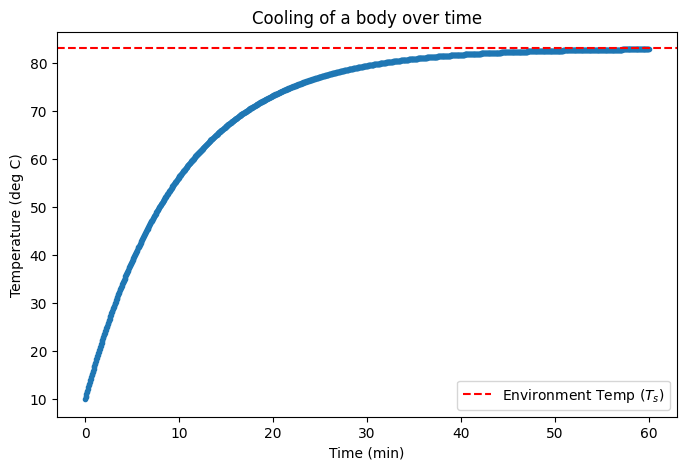

In [32]:
plt.figure(figsize=(8,5))
plt.plot(my_time, my_temp, 'o-', markersize=3)
plt.axhline(Ts, color='red', linestyle='--', label='Environment Temp ($T_s$)')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (deg C)')
plt.title('Cooling of a body over time')
plt.legend()

Alternatively, and in order to re use code in future problems, we could have created a function.

In [34]:
def euler(y, f, dx):
    return y + f*dx

In [37]:
T = T0
for i in range(1, nsteps):
    T = euler(T, -r*(T-Ts), dt)
    my_temp[i] = T

Actually, for this particularly simple case, calling a function may introduce unecessary overhead, but it is a an example that we will find useful for future applications. For a simple function like this we could have used a "lambda" function (more about lambda functions <a href="http://www.secnetix.de/olli/Python/lambda_functions.hawk">here</a>).

In [39]:
euler = lambda y, f, dx: y + f*dx

Now, let's study the effects of different time steps $dt$ on the convergence. We expect that as $dt$ gets small, the result gets better and better but it's slower and slower

(48.0, 58.0)

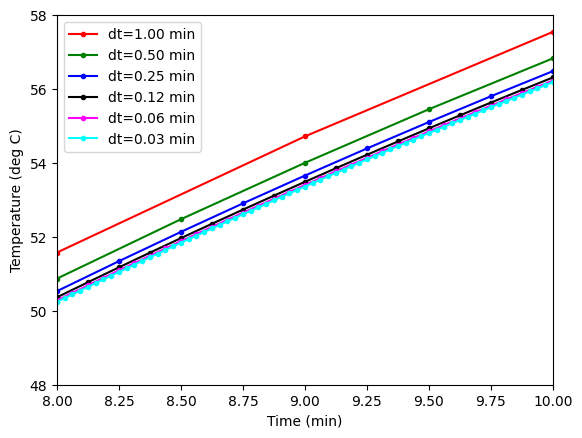

In [48]:
dt = 1.
my_color = ['red', 'green', 'blue', 'black', 'magenta', 'cyan']
for j in range(len(my_color)):
    nsteps = int(tmax/dt)
    my_time = np.linspace(dt,tmax,nsteps)
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
    plt.plot(my_time, my_temp, 'o-', color=my_color[j], markersize=3, label=f'dt={dt:.2f} min')
    dt = dt / 2.

plt.xlabel('Time (min)')
plt.ylabel('Temperature (deg C)')
plt.legend()
plt.xlim(8,10)
plt.ylim(48,58)

We see that the gap between the result gets smaller and smaller as $dt$ gets smaller and smaller. This problem is too simple to see the effect of $dt$ on computation time.

But on theoretical grounds, how does computation time scale?

### Challenge 1.1

To properly study convergence, one possibility it so look at the result at a given time, for different time steps. Modify the previous program to print the temperature at $t=10$ as a function of $\Delta t$. 

In [49]:
dt = 1.
dts, temp_at_t10s = [], []
for j in range(0,15):
    dts.append(dt)
    nsteps = int(tmax/dt)
    my_time = np.linspace(dt,tmax,nsteps)
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(0,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
    t10_idx = np.where(my_time==10.)[0][0]
    temp_at_t10s.append(my_temp[t10_idx])
    dt = dt / 2.

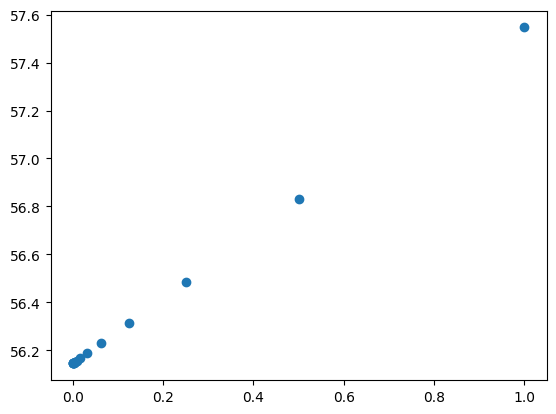

In [50]:
plt.scatter(dts, temp_at_t10s)

This shows explicit convergence to a fixed value. We'd also like to see the temperature differents

Text(0, 0.5, 'Absolute difference in T at t=10 min')

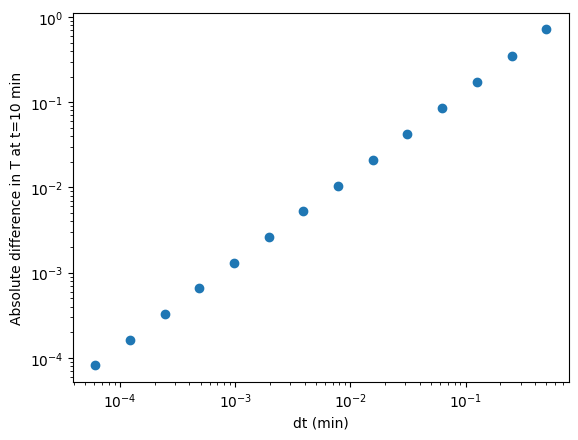

In [53]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(dts[1:], [abs(temp_at_t10s[i]-temp_at_t10s[i-1]) for i in range(1,len(dts))])
# label this 
plt.xlabel('dt (min)')
plt.ylabel('Absolute difference in T at t=10 min')

Such a beautiful line on a log-log scale tells us that the temperature difference for different dts scales as a power law. Let's find out what the exponent is by fitting a line to the data.


In [54]:
# use np.polyfit to find the exponent 
log_dts = np.log(dts[1:])
log_diffs = np.log([abs(temp_at_t10s[i]-temp_at_t10s[i-1]) for i in range(1,len(dts))])
coeffs = np.polyfit(log_dts, log_diffs, 1)
print(f"Slope of line (exponent) = {coeffs[0]:.2f}")

Slope of line (exponent) = 1.00


The slope being $1$ tells us the power law.